In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
from fastai.imports import *
from fastai.vision import *
from fastai.train import *
from constant import *
from pretrainedmodels import *
from constant import *
import pixiedust

Pixiedust database opened successfully


In [21]:
PATH = Path('/mnt/data/xray-thesis/data/chestX-ray14')
PATH = Path('/mnt/data/xray-thesis/data/chestX-ray14')
IMAGE_DN = 'images'
TRAIN_CSV = 'train_list.csv'
TEST_CSV = 'test_list.csv'
sz = 224
bs = 32
arch = lambda _: densenet121(num_classes=1000, pretrained='imagenet')
N_CLASSES = 15

In [23]:
transform = get_transforms(do_flip=True)
train_data = ImageDataBunch.from_csv(path=PATH, folder='images', csv_labels=TRAIN_CSV, sep='|', size=sz)

train_data.show_batch(ds_type=DatasetType.Valid)

In [24]:
learn = create_cnn(train_data, arch, metrics=accuracy).to_fp16()

/home/dattran/miniconda3/envs/thesis/lib/python3.7/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA out of memory. Tried to allocate 17179869183.00 GiB (GPU 0; 7.76 GiB total capacity; 2.79 GiB already allocated; 2.26 GiB free; 2.00 GiB cached)

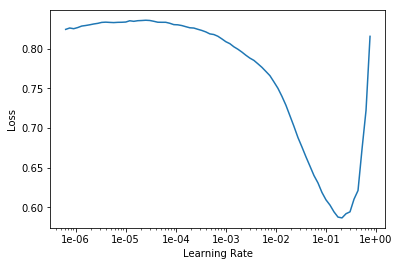

In [7]:
learn.recorder.plot()

In [8]:
lr = 0.05
lrs = np.array([lr/9, lr/3, lr])

In [9]:
learn.fit(3, lr)

epoch,train_loss,valid_loss,accuracy


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'other'